In [18]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
.cm-s-ipython span.cm-comment{font-size:12pt; font-style:normal; color:orange;}
.ansi-yellow-bg{color:black;font-size:15pt;}

</style>
<style>
span.toc-item-num{display:none;}
</style>
"""))

# 1. 기존의 프로그램방식
- 회귀분석 설명 사이트: https://gbhat.com/machine_learning/linear_regression.html
- 오차함수: MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균) 
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사 하강법 설명
    - https://www.mql5.com/ko/articles/11200

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 섭씨온도(input_data)를 받아 화씨온도로 출력
def celsisu_to_faherenheit(c):
    return c*1.8 +32 

In [8]:
input_c = int(input('섭씨온도는?'))
print(celsisu_to_faherenheit(input_c))

섭씨온도는?0
32.0


# 2. 머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성 (inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류....)
- 3. 모델구성
- 4. 모델 학습 과정 설정(손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장후 , 저장된 모델을 이용하여,입력값이 주어지면 예측값 받기)

## 2.1 노이즈가 없는 데이터로 실습

In [14]:
# 1. 데이터 생성
data_c = np.arange(100)# 독립변수(input_data)
data_f =celsisu_to_faherenheit(data_c)#종속변수(output_data)
data_f

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [15]:
# 데이터 전처리 : 컴퓨터에게 학습시키기 위해서 스케일을 맞춤(전체의 편차를 비슷하게)
scaled_data_c = data_c/100
scaled_data_f = data_f/100
scaled_data_f

array([0.32 , 0.338, 0.356, 0.374, 0.392, 0.41 , 0.428, 0.446, 0.464,
       0.482, 0.5  , 0.518, 0.536, 0.554, 0.572, 0.59 , 0.608, 0.626,
       0.644, 0.662, 0.68 , 0.698, 0.716, 0.734, 0.752, 0.77 , 0.788,
       0.806, 0.824, 0.842, 0.86 , 0.878, 0.896, 0.914, 0.932, 0.95 ,
       0.968, 0.986, 1.004, 1.022, 1.04 , 1.058, 1.076, 1.094, 1.112,
       1.13 , 1.148, 1.166, 1.184, 1.202, 1.22 , 1.238, 1.256, 1.274,
       1.292, 1.31 , 1.328, 1.346, 1.364, 1.382, 1.4  , 1.418, 1.436,
       1.454, 1.472, 1.49 , 1.508, 1.526, 1.544, 1.562, 1.58 , 1.598,
       1.616, 1.634, 1.652, 1.67 , 1.688, 1.706, 1.724, 1.742, 1.76 ,
       1.778, 1.796, 1.814, 1.832, 1.85 , 1.868, 1.886, 1.904, 1.922,
       1.94 , 1.958, 1.976, 1.994, 2.012, 2.03 , 2.048, 2.066, 2.084,
       2.102])

In [16]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
# 3.모델구성
# pip install tensorflow==2.10
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense #입력값과 출력값으로 layer 층 지정

model = Sequential()
# model.add(Input(shape=1))
model.add(Dense(1, # 종속(타겟,출력)변수의갯수
               input_shape=(1,) # 독립(입력)변수의 shape
               )) # 모델에 layer를 추가


In [30]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse',optimizer="rmsprop",metrics=['mae'])
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001F734BE06D0>>


In [31]:
# 학습하기 전 예측
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 43ms/step


array([[ 0.        ],
       [-0.01066123]], dtype=float32)

In [33]:
model.save('model/before_learning.h5')

In [34]:
# 5. 학습시키기
hist = model.fit(scaled_data_c,# 독립변수(훈련데이터)
                 scaled_data_f,# 종속변수(훈련데이터)
                 epochs=1000, # 1000번 학습
                 verbose=2    # 학습시출력데이터
                )

Epoch 1/1000
4/4 - 0s - loss: 3.6896 - mae: 1.7341 - 422ms/epoch - 106ms/step
Epoch 2/1000
4/4 - 0s - loss: 3.6460 - mae: 1.7225 - 23ms/epoch - 6ms/step
Epoch 3/1000
4/4 - 0s - loss: 3.6166 - mae: 1.7144 - 18ms/epoch - 5ms/step
Epoch 4/1000
4/4 - 0s - loss: 3.5919 - mae: 1.7079 - 22ms/epoch - 6ms/step
Epoch 5/1000
4/4 - 0s - loss: 3.5673 - mae: 1.7014 - 22ms/epoch - 6ms/step
Epoch 6/1000
4/4 - 0s - loss: 3.5428 - mae: 1.6947 - 20ms/epoch - 5ms/step
Epoch 7/1000
4/4 - 0s - loss: 3.5208 - mae: 1.6887 - 17ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 3.5007 - mae: 1.6834 - 19ms/epoch - 5ms/step
Epoch 9/1000
4/4 - 0s - loss: 3.4768 - mae: 1.6768 - 19ms/epoch - 5ms/step
Epoch 10/1000
4/4 - 0s - loss: 3.4564 - mae: 1.6713 - 20ms/epoch - 5ms/step
Epoch 11/1000
4/4 - 0s - loss: 3.4346 - mae: 1.6653 - 22ms/epoch - 5ms/step
Epoch 12/1000
4/4 - 0s - loss: 3.4137 - mae: 1.6596 - 20ms/epoch - 5ms/step
Epoch 13/1000
4/4 - 0s - loss: 3.3914 - mae: 1.6534 - 21ms/epoch - 5ms/step
Epoch 14/1000
4/4 

Epoch 109/1000
4/4 - 0s - loss: 1.6898 - mae: 1.0994 - 17ms/epoch - 4ms/step
Epoch 110/1000
4/4 - 0s - loss: 1.6747 - mae: 1.0938 - 19ms/epoch - 5ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.6588 - mae: 1.0878 - 18ms/epoch - 5ms/step
Epoch 112/1000
4/4 - 0s - loss: 1.6448 - mae: 1.0823 - 18ms/epoch - 5ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.6318 - mae: 1.0774 - 18ms/epoch - 4ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.6175 - mae: 1.0719 - 18ms/epoch - 5ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.6041 - mae: 1.0668 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.5894 - mae: 1.0611 - 18ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.5756 - mae: 1.0558 - 19ms/epoch - 5ms/step
Epoch 118/1000
4/4 - 0s - loss: 1.5636 - mae: 1.0511 - 18ms/epoch - 5ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.5497 - mae: 1.0458 - 16ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.5371 - mae: 1.0410 - 16ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.5219 - mae: 1.0349 - 19ms/epoch - 5ms/step

Epoch 216/1000
4/4 - 0s - loss: 0.5749 - mae: 0.6215 - 19ms/epoch - 5ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.5676 - mae: 0.6178 - 19ms/epoch - 5ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.5607 - mae: 0.6142 - 19ms/epoch - 5ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.5540 - mae: 0.6109 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.5477 - mae: 0.6076 - 19ms/epoch - 5ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.5416 - mae: 0.6045 - 19ms/epoch - 5ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.5346 - mae: 0.6010 - 18ms/epoch - 4ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.5283 - mae: 0.5975 - 19ms/epoch - 5ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.5224 - mae: 0.5944 - 18ms/epoch - 5ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.5161 - mae: 0.5912 - 18ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.5096 - mae: 0.5878 - 17ms/epoch - 4ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.5033 - mae: 0.5844 - 18ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.4982 - mae: 0.5817 - 18ms/epoch - 5ms/step

Epoch 323/1000
4/4 - 0s - loss: 0.2243 - mae: 0.4101 - 17ms/epoch - 4ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.2232 - mae: 0.4092 - 18ms/epoch - 5ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.2222 - mae: 0.4083 - 18ms/epoch - 4ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.2211 - mae: 0.4072 - 18ms/epoch - 5ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.2201 - mae: 0.4062 - 17ms/epoch - 4ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.2192 - mae: 0.4055 - 17ms/epoch - 4ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.2185 - mae: 0.4049 - 18ms/epoch - 5ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.2175 - mae: 0.4038 - 18ms/epoch - 5ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.2168 - mae: 0.4032 - 16ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.2158 - mae: 0.4022 - 19ms/epoch - 5ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.2149 - mae: 0.4014 - 18ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.2139 - mae: 0.4005 - 17ms/epoch - 4ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.2130 - mae: 0.3996 - 19ms/epoch - 5ms/step

Epoch 430/1000
4/4 - 0s - loss: 0.1369 - mae: 0.3199 - 30ms/epoch - 7ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.1361 - mae: 0.3189 - 19ms/epoch - 5ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.1355 - mae: 0.3182 - 18ms/epoch - 5ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.1349 - mae: 0.3175 - 19ms/epoch - 5ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.1342 - mae: 0.3167 - 18ms/epoch - 4ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.1336 - mae: 0.3158 - 18ms/epoch - 5ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.1330 - mae: 0.3152 - 18ms/epoch - 5ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.1324 - mae: 0.3145 - 18ms/epoch - 5ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.1317 - mae: 0.3136 - 18ms/epoch - 5ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.1311 - mae: 0.3130 - 18ms/epoch - 5ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.1305 - mae: 0.3122 - 20ms/epoch - 5ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.1298 - mae: 0.3115 - 18ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.1290 - mae: 0.3106 - 19ms/epoch - 5ms/step

Epoch 537/1000
4/4 - 0s - loss: 0.0705 - mae: 0.2294 - 20ms/epoch - 5ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0699 - mae: 0.2283 - 18ms/epoch - 5ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0694 - mae: 0.2275 - 18ms/epoch - 5ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0688 - mae: 0.2266 - 18ms/epoch - 5ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0682 - mae: 0.2257 - 20ms/epoch - 5ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0677 - mae: 0.2247 - 19ms/epoch - 5ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0673 - mae: 0.2241 - 19ms/epoch - 5ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0669 - mae: 0.2234 - 18ms/epoch - 5ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0663 - mae: 0.2226 - 19ms/epoch - 5ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0659 - mae: 0.2217 - 18ms/epoch - 5ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0654 - mae: 0.2210 - 19ms/epoch - 5ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0649 - mae: 0.2202 - 19ms/epoch - 5ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0643 - mae: 0.2191 - 18ms/epoch - 4ms/step

Epoch 644/1000
4/4 - 0s - loss: 0.0264 - mae: 0.1405 - 18ms/epoch - 4ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0261 - mae: 0.1397 - 17ms/epoch - 4ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0259 - mae: 0.1390 - 18ms/epoch - 4ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0256 - mae: 0.1383 - 20ms/epoch - 5ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0253 - mae: 0.1374 - 20ms/epoch - 5ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0250 - mae: 0.1365 - 20ms/epoch - 5ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0246 - mae: 0.1356 - 21ms/epoch - 5ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0244 - mae: 0.1349 - 18ms/epoch - 4ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0241 - mae: 0.1341 - 18ms/epoch - 4ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0238 - mae: 0.1334 - 19ms/epoch - 5ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0235 - mae: 0.1325 - 19ms/epoch - 5ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0232 - mae: 0.1315 - 19ms/epoch - 5ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0230 - mae: 0.1309 - 19ms/epoch - 5ms/step

Epoch 751/1000
4/4 - 0s - loss: 0.0042 - mae: 0.0559 - 19ms/epoch - 5ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0041 - mae: 0.0550 - 19ms/epoch - 5ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0039 - mae: 0.0542 - 19ms/epoch - 5ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0533 - 18ms/epoch - 5ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0037 - mae: 0.0525 - 19ms/epoch - 5ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0517 - 19ms/epoch - 5ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0507 - 17ms/epoch - 4ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0033 - mae: 0.0498 - 19ms/epoch - 5ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0489 - 17ms/epoch - 4ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0480 - 18ms/epoch - 5ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0472 - 19ms/epoch - 5ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0463 - 18ms/epoch - 5ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0454 - 18ms/epoch - 4ms/step

Epoch 853/1000
4/4 - 0s - loss: 6.1895e-07 - mae: 7.5722e-04 - 18ms/epoch - 4ms/step
Epoch 854/1000
4/4 - 0s - loss: 1.9793e-07 - mae: 4.3464e-04 - 18ms/epoch - 4ms/step
Epoch 855/1000
4/4 - 0s - loss: 7.1807e-07 - mae: 8.2543e-04 - 21ms/epoch - 5ms/step
Epoch 856/1000
4/4 - 0s - loss: 6.9884e-07 - mae: 8.2034e-04 - 20ms/epoch - 5ms/step
Epoch 857/1000
4/4 - 0s - loss: 7.0405e-08 - mae: 2.4405e-04 - 19ms/epoch - 5ms/step
Epoch 858/1000
4/4 - 0s - loss: 1.5004e-07 - mae: 3.5357e-04 - 19ms/epoch - 5ms/step
Epoch 859/1000
4/4 - 0s - loss: 9.0664e-07 - mae: 8.7066e-04 - 21ms/epoch - 5ms/step
Epoch 860/1000
4/4 - 0s - loss: 5.9924e-07 - mae: 7.4490e-04 - 20ms/epoch - 5ms/step
Epoch 861/1000
4/4 - 0s - loss: 7.1789e-07 - mae: 8.2177e-04 - 18ms/epoch - 5ms/step
Epoch 862/1000
4/4 - 0s - loss: 3.0702e-07 - mae: 5.4246e-04 - 20ms/epoch - 5ms/step
Epoch 863/1000
4/4 - 0s - loss: 4.9659e-07 - mae: 6.8954e-04 - 20ms/epoch - 5ms/step
Epoch 864/1000
4/4 - 0s - loss: 3.8597e-07 - mae: 6.0255e-04 - 21

Epoch 950/1000
4/4 - 0s - loss: 1.7125e-07 - mae: 3.9277e-04 - 17ms/epoch - 4ms/step
Epoch 951/1000
4/4 - 0s - loss: 1.2507e-06 - mae: 0.0011 - 19ms/epoch - 5ms/step
Epoch 952/1000
4/4 - 0s - loss: 7.2276e-08 - mae: 2.4983e-04 - 18ms/epoch - 5ms/step
Epoch 953/1000
4/4 - 0s - loss: 8.7136e-07 - mae: 9.0543e-04 - 19ms/epoch - 5ms/step
Epoch 954/1000
4/4 - 0s - loss: 2.8973e-07 - mae: 5.2700e-04 - 18ms/epoch - 4ms/step
Epoch 955/1000
4/4 - 0s - loss: 6.0084e-07 - mae: 7.5774e-04 - 18ms/epoch - 5ms/step
Epoch 956/1000
4/4 - 0s - loss: 5.6378e-07 - mae: 7.3176e-04 - 18ms/epoch - 5ms/step
Epoch 957/1000
4/4 - 0s - loss: 1.0077e-06 - mae: 9.7834e-04 - 18ms/epoch - 5ms/step
Epoch 958/1000
4/4 - 0s - loss: 3.2883e-07 - mae: 5.6137e-04 - 18ms/epoch - 5ms/step
Epoch 959/1000
4/4 - 0s - loss: 7.8900e-07 - mae: 8.6863e-04 - 18ms/epoch - 4ms/step
Epoch 960/1000
4/4 - 0s - loss: 5.3007e-07 - mae: 7.1533e-04 - 18ms/epoch - 5ms/step
Epoch 961/1000
4/4 - 0s - loss: 4.4586e-07 - mae: 6.5185e-04 - 18ms/e

In [35]:
# 6. 모델 평가 (시험 데이터 셋으로 모델 평가)
hist.history

{'loss': [3.6896450519561768,
  3.645977258682251,
  3.6166465282440186,
  3.591916799545288,
  3.5673367977142334,
  3.5427756309509277,
  3.5208382606506348,
  3.5007152557373047,
  3.476844549179077,
  3.4564285278320312,
  3.4345619678497314,
  3.413731098175049,
  3.3914246559143066,
  3.368175983428955,
  3.3487746715545654,
  3.3286244869232178,
  3.3065481185913086,
  3.286412000656128,
  3.2656328678131104,
  3.244083881378174,
  3.2222821712493896,
  3.2013208866119385,
  3.182131052017212,
  3.1608803272247314,
  3.1412360668182373,
  3.1220059394836426,
  3.102109670639038,
  3.0817911624908447,
  3.0613415241241455,
  3.040682792663574,
  3.0204787254333496,
  3.000002384185791,
  2.9808733463287354,
  2.9597513675689697,
  2.9401004314422607,
  2.9206292629241943,
  2.9001595973968506,
  2.8805572986602783,
  2.86055850982666,
  2.841499090194702,
  2.821614980697632,
  2.8028104305267334,
  2.7830896377563477,
  2.764277696609497,
  2.7462856769561768,
  2.72779178619384

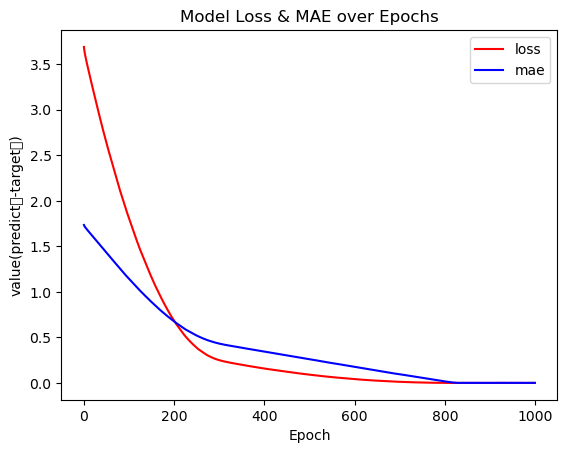

In [40]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value(predict값-target값)')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [41]:
# 7. 모델 사용하기
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 24ms/step


array([[0.32057527],
       [0.3385782 ]], dtype=float32)

In [42]:
model.save('model/after_learning.h5')

In [47]:
# 실제값 : scaled_data_fabs
# 예측값 : y_hat
y_hat = model.predict([scaled_data_c])
for y,h in zip(scaled_data_f,y_hat):
    print('실제값:{},예측값:{}'.format(y*100,round(h[0]*100,1)))

4/4 [==============================] - 0s 3ms/step
실제값:32.0,예측값:32.1
실제값:33.8,예측값:33.9
실제값:35.6,예측값:35.7
실제값:37.4,예측값:37.5
실제값:39.2,예측값:39.3
실제값:41.0,예측값:41.1
실제값:42.8,예측값:42.9
실제값:44.6,예측값:44.7
실제값:46.4,예측값:46.5
실제값:48.2,예측값:48.3
실제값:50.0,예측값:50.1
실제값:51.800000000000004,예측값:51.9
실제값:53.6,예측값:53.7
실제값:55.400000000000006,예측값:55.5
실제값:57.2,예측값:57.3
실제값:59.0,예측값:59.1
실제값:60.8,예측값:60.9
실제값:62.6,예측값:62.7
실제값:64.4,예측값:64.5
실제값:66.2,예측값:66.3
실제값:68.0,예측값:68.1
실제값:69.80000000000001,예측값:69.9
실제값:71.6,예측값:71.7
실제값:73.4,예측값:73.5
실제값:75.2,예측값:75.3
실제값:77.0,예측값:77.1
실제값:78.80000000000001,예측값:78.9
실제값:80.6,예측값:80.7
실제값:82.4,예측값:82.5
실제값:84.2,예측값:84.3
실제값:86.0,예측값:86.1
실제값:87.80000000000001,예측값:87.9
실제값:89.6,예측값:89.7
실제값:91.4,예측값:91.5
실제값:93.2,예측값:93.3
실제값:95.0,예측값:95.1
실제값:96.8,예측값:96.9
실제값:98.60000000000001,예측값:98.7
실제값:100.4,예측값:100.5
실제값:102.2,예측값:102.3
실제값:104.0,예측값:104.1
실제값:105.80000000000001,예측값:105.9
실제값:107.60000000000001,예측값:107.7
실제값:109.4,예측값:109.5
실제값:111.20000000000002,예측값:111.3
실제값:11

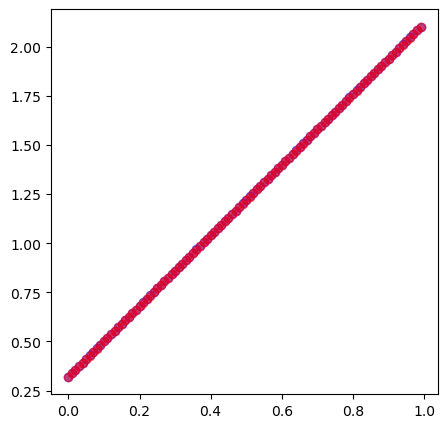

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(x=scaled_data_c,y=y_hat,c='b',alpha=0.5)
plt.scatter(x=scaled_data_c,y=scaled_data_f,c='r',alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [58]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(7)
noise = np.random.normal(loc=0,scale=0.01,size=100)
print(noise)
print(scaled_data_f)
scaled_data_f = scaled_data_f+noise


[ 1.69052570e-02 -4.65937371e-03  3.28201637e-04  4.07516283e-03
 -7.88923029e-03  2.06557291e-05 -8.90385858e-06 -1.75472431e-02
  1.01765801e-02  6.00498516e-03 -6.25428974e-03 -1.71548261e-03
  5.05299374e-03 -2.61356415e-03 -2.42749079e-03 -1.45324141e-02
  5.54580312e-03  1.23880905e-03  2.74459924e-03 -1.52652453e-02
  1.65069969e-02  1.54335535e-03 -3.87139943e-03  2.02907222e-02
 -4.53860299e-04 -1.45067870e-02 -4.05227855e-03 -2.28831510e-02
  1.04939655e-02 -4.16474319e-03 -7.42553525e-03  1.07247013e-02
 -1.65107559e-02  5.35429356e-03 -2.06441480e-02 -6.62159340e-03
 -1.20421985e-02  1.46197563e-02  1.76616088e-02 -3.29413752e-03
  8.40733242e-03 -1.79986401e-03  5.68061887e-03 -7.52837196e-03
 -1.70833920e-02 -1.80309866e-02  3.83121852e-03  2.24759505e-02
  2.69411631e-03 -5.24604619e-03  1.91201886e-02  2.37301847e-03
  1.01433985e-03  2.52577736e-03 -1.32377198e-03 -3.09476341e-03
 -1.43496347e-02  5.01624123e-03 -9.47754504e-04  1.19308592e-02
 -3.68818468e-03 -1.90636

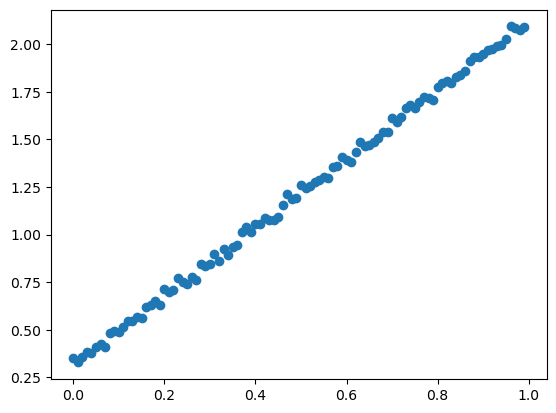

In [57]:
plt.scatter(x=scaled_data_c,y=scaled_data_f)
plt.show()

In [61]:
# 3. 모델 구성
model2= Sequential()
model2.add(Dense(1,input_shape=(1,)))
# 4. 모델 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
# 5.학습시키기
hist2 = model2.fit(scaled_data_c, scaled_data_f, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 3.3757 - mae: 1.6603 - 346ms/epoch - 86ms/step
Epoch 2/1000
4/4 - 0s - loss: 3.3337 - mae: 1.6487 - 18ms/epoch - 5ms/step
Epoch 3/1000
4/4 - 0s - loss: 3.3063 - mae: 1.6410 - 21ms/epoch - 5ms/step
Epoch 4/1000
4/4 - 0s - loss: 3.2798 - mae: 1.6336 - 22ms/epoch - 5ms/step
Epoch 5/1000
4/4 - 0s - loss: 3.2583 - mae: 1.6274 - 19ms/epoch - 5ms/step
Epoch 6/1000
4/4 - 0s - loss: 3.2376 - mae: 1.6217 - 18ms/epoch - 5ms/step
Epoch 7/1000
4/4 - 0s - loss: 3.2153 - mae: 1.6153 - 18ms/epoch - 4ms/step
Epoch 8/1000
4/4 - 0s - loss: 3.1925 - mae: 1.6089 - 19ms/epoch - 5ms/step
Epoch 9/1000
4/4 - 0s - loss: 3.1710 - mae: 1.6027 - 20ms/epoch - 5ms/step
Epoch 10/1000
4/4 - 0s - loss: 3.1494 - mae: 1.5966 - 21ms/epoch - 5ms/step
Epoch 11/1000
4/4 - 0s - loss: 3.1310 - mae: 1.5913 - 22ms/epoch - 5ms/step
Epoch 12/1000
4/4 - 0s - loss: 3.1077 - mae: 1.5846 - 24ms/epoch - 6ms/step
Epoch 13/1000
4/4 - 0s - loss: 3.0886 - mae: 1.5791 - 20ms/epoch - 5ms/step
Epoch 14/1000
4/4 -

Epoch 109/1000
4/4 - 0s - loss: 1.4834 - mae: 1.0268 - 18ms/epoch - 5ms/step
Epoch 110/1000
4/4 - 0s - loss: 1.4709 - mae: 1.0218 - 18ms/epoch - 5ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.4585 - mae: 1.0168 - 19ms/epoch - 5ms/step
Epoch 112/1000
4/4 - 0s - loss: 1.4476 - mae: 1.0125 - 18ms/epoch - 4ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.4358 - mae: 1.0078 - 18ms/epoch - 5ms/step
Epoch 114/1000
4/4 - 0s - loss: 1.4217 - mae: 1.0021 - 17ms/epoch - 4ms/step
Epoch 115/1000
4/4 - 0s - loss: 1.4090 - mae: 0.9969 - 19ms/epoch - 5ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.3965 - mae: 0.9921 - 18ms/epoch - 4ms/step
Epoch 117/1000
4/4 - 0s - loss: 1.3826 - mae: 0.9865 - 17ms/epoch - 4ms/step
Epoch 118/1000
4/4 - 0s - loss: 1.3689 - mae: 0.9809 - 19ms/epoch - 5ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.3560 - mae: 0.9756 - 17ms/epoch - 4ms/step
Epoch 120/1000
4/4 - 0s - loss: 1.3438 - mae: 0.9707 - 17ms/epoch - 4ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.3301 - mae: 0.9651 - 19ms/epoch - 5ms/step

Epoch 216/1000
4/4 - 0s - loss: 0.4687 - mae: 0.5623 - 18ms/epoch - 4ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.4639 - mae: 0.5595 - 19ms/epoch - 5ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.4585 - mae: 0.5566 - 18ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.4522 - mae: 0.5529 - 20ms/epoch - 5ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.4469 - mae: 0.5499 - 19ms/epoch - 5ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.4419 - mae: 0.5473 - 17ms/epoch - 4ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.4362 - mae: 0.5440 - 18ms/epoch - 5ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.4305 - mae: 0.5409 - 20ms/epoch - 5ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.4246 - mae: 0.5376 - 18ms/epoch - 5ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.4198 - mae: 0.5351 - 17ms/epoch - 4ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.4149 - mae: 0.5324 - 19ms/epoch - 5ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.4104 - mae: 0.5298 - 17ms/epoch - 4ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.4057 - mae: 0.5273 - 18ms/epoch - 4ms/step

Epoch 323/1000
4/4 - 0s - loss: 0.1916 - mae: 0.3786 - 18ms/epoch - 4ms/step
Epoch 324/1000
4/4 - 0s - loss: 0.1906 - mae: 0.3775 - 19ms/epoch - 5ms/step
Epoch 325/1000
4/4 - 0s - loss: 0.1897 - mae: 0.3765 - 19ms/epoch - 5ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.1888 - mae: 0.3757 - 18ms/epoch - 5ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.1878 - mae: 0.3744 - 19ms/epoch - 5ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.1870 - mae: 0.3735 - 19ms/epoch - 5ms/step
Epoch 329/1000
4/4 - 0s - loss: 0.1862 - mae: 0.3727 - 20ms/epoch - 5ms/step
Epoch 330/1000
4/4 - 0s - loss: 0.1856 - mae: 0.3721 - 19ms/epoch - 5ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.1849 - mae: 0.3714 - 17ms/epoch - 4ms/step
Epoch 332/1000
4/4 - 0s - loss: 0.1841 - mae: 0.3704 - 19ms/epoch - 5ms/step
Epoch 333/1000
4/4 - 0s - loss: 0.1834 - mae: 0.3698 - 15ms/epoch - 4ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.1825 - mae: 0.3688 - 19ms/epoch - 5ms/step
Epoch 335/1000
4/4 - 0s - loss: 0.1819 - mae: 0.3682 - 19ms/epoch - 5ms/step

Epoch 430/1000
4/4 - 0s - loss: 0.1141 - mae: 0.2902 - 18ms/epoch - 5ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.1135 - mae: 0.2893 - 20ms/epoch - 5ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.1128 - mae: 0.2885 - 18ms/epoch - 5ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.1122 - mae: 0.2878 - 16ms/epoch - 4ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.1116 - mae: 0.2869 - 19ms/epoch - 5ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.1109 - mae: 0.2862 - 18ms/epoch - 4ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.1103 - mae: 0.2853 - 18ms/epoch - 4ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.1096 - mae: 0.2844 - 19ms/epoch - 5ms/step
Epoch 438/1000
4/4 - 0s - loss: 0.1090 - mae: 0.2834 - 18ms/epoch - 5ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.1085 - mae: 0.2829 - 19ms/epoch - 5ms/step
Epoch 440/1000
4/4 - 0s - loss: 0.1080 - mae: 0.2821 - 18ms/epoch - 5ms/step
Epoch 441/1000
4/4 - 0s - loss: 0.1074 - mae: 0.2813 - 17ms/epoch - 4ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.1067 - mae: 0.2804 - 17ms/epoch - 4ms/step

Epoch 537/1000
4/4 - 0s - loss: 0.0570 - mae: 0.2046 - 19ms/epoch - 5ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0565 - mae: 0.2038 - 21ms/epoch - 5ms/step
Epoch 539/1000
4/4 - 0s - loss: 0.0561 - mae: 0.2029 - 19ms/epoch - 5ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0557 - mae: 0.2021 - 18ms/epoch - 4ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0554 - mae: 0.2016 - 19ms/epoch - 5ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0549 - mae: 0.2008 - 17ms/epoch - 4ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0545 - mae: 0.2000 - 19ms/epoch - 5ms/step
Epoch 544/1000
4/4 - 0s - loss: 0.0539 - mae: 0.1990 - 18ms/epoch - 5ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0535 - mae: 0.1982 - 18ms/epoch - 4ms/step
Epoch 546/1000
4/4 - 0s - loss: 0.0530 - mae: 0.1973 - 17ms/epoch - 4ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0526 - mae: 0.1966 - 18ms/epoch - 5ms/step
Epoch 548/1000
4/4 - 0s - loss: 0.0523 - mae: 0.1958 - 17ms/epoch - 4ms/step
Epoch 549/1000
4/4 - 0s - loss: 0.0520 - mae: 0.1953 - 17ms/epoch - 4ms/step

Epoch 644/1000
4/4 - 0s - loss: 0.0190 - mae: 0.1179 - 21ms/epoch - 5ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0187 - mae: 0.1170 - 19ms/epoch - 5ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1161 - 20ms/epoch - 5ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1153 - 18ms/epoch - 4ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1148 - 18ms/epoch - 4ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0178 - mae: 0.1141 - 20ms/epoch - 5ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0176 - mae: 0.1133 - 19ms/epoch - 5ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0174 - mae: 0.1125 - 19ms/epoch - 5ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0171 - mae: 0.1119 - 18ms/epoch - 4ms/step
Epoch 653/1000
4/4 - 0s - loss: 0.0168 - mae: 0.1109 - 18ms/epoch - 4ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0166 - mae: 0.1100 - 18ms/epoch - 4ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0164 - mae: 0.1093 - 19ms/epoch - 5ms/step
Epoch 656/1000
4/4 - 0s - loss: 0.0162 - mae: 0.1085 - 20ms/epoch - 5ms/step

Epoch 751/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0413 - 19ms/epoch - 5ms/step
Epoch 752/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0404 - 18ms/epoch - 4ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0400 - 19ms/epoch - 5ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0393 - 19ms/epoch - 5ms/step
Epoch 755/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0391 - 19ms/epoch - 5ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0383 - 22ms/epoch - 5ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0378 - 21ms/epoch - 5ms/step
Epoch 758/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0373 - 19ms/epoch - 5ms/step
Epoch 759/1000
4/4 - 0s - loss: 0.0020 - mae: 0.0369 - 23ms/epoch - 6ms/step
Epoch 760/1000
4/4 - 0s - loss: 0.0020 - mae: 0.0366 - 20ms/epoch - 5ms/step
Epoch 761/1000
4/4 - 0s - loss: 0.0019 - mae: 0.0362 - 20ms/epoch - 5ms/step
Epoch 762/1000
4/4 - 0s - loss: 0.0019 - mae: 0.0357 - 22ms/epoch - 6ms/step
Epoch 763/1000
4/4 - 0s - loss: 0.0019 - mae: 0.0353 - 21ms/epoch - 5ms/step

Epoch 855/1000
4/4 - 0s - loss: 9.2926e-04 - mae: 0.0241 - 18ms/epoch - 5ms/step
Epoch 856/1000
4/4 - 0s - loss: 9.3525e-04 - mae: 0.0244 - 17ms/epoch - 4ms/step
Epoch 857/1000
4/4 - 0s - loss: 9.2745e-04 - mae: 0.0242 - 17ms/epoch - 4ms/step
Epoch 858/1000
4/4 - 0s - loss: 9.3617e-04 - mae: 0.0244 - 18ms/epoch - 5ms/step
Epoch 859/1000
4/4 - 0s - loss: 9.2846e-04 - mae: 0.0241 - 19ms/epoch - 5ms/step
Epoch 860/1000
4/4 - 0s - loss: 9.2654e-04 - mae: 0.0242 - 19ms/epoch - 5ms/step
Epoch 861/1000
4/4 - 0s - loss: 9.2512e-04 - mae: 0.0241 - 18ms/epoch - 5ms/step
Epoch 862/1000
4/4 - 0s - loss: 9.3030e-04 - mae: 0.0243 - 18ms/epoch - 5ms/step
Epoch 863/1000
4/4 - 0s - loss: 9.3865e-04 - mae: 0.0240 - 19ms/epoch - 5ms/step
Epoch 864/1000
4/4 - 0s - loss: 9.2769e-04 - mae: 0.0241 - 17ms/epoch - 4ms/step
Epoch 865/1000
4/4 - 0s - loss: 9.4476e-04 - mae: 0.0242 - 17ms/epoch - 4ms/step
Epoch 866/1000
4/4 - 0s - loss: 9.2742e-04 - mae: 0.0242 - 18ms/epoch - 4ms/step
Epoch 867/1000
4/4 - 0s - lo

4/4 - 0s - loss: 9.2841e-04 - mae: 0.0240 - 19ms/epoch - 5ms/step
Epoch 957/1000
4/4 - 0s - loss: 9.2858e-04 - mae: 0.0243 - 19ms/epoch - 5ms/step
Epoch 958/1000
4/4 - 0s - loss: 9.2819e-04 - mae: 0.0241 - 18ms/epoch - 4ms/step
Epoch 959/1000
4/4 - 0s - loss: 9.2776e-04 - mae: 0.0241 - 18ms/epoch - 5ms/step
Epoch 960/1000
4/4 - 0s - loss: 9.3322e-04 - mae: 0.0240 - 20ms/epoch - 5ms/step
Epoch 961/1000
4/4 - 0s - loss: 9.3400e-04 - mae: 0.0243 - 18ms/epoch - 5ms/step
Epoch 962/1000
4/4 - 0s - loss: 9.2982e-04 - mae: 0.0243 - 20ms/epoch - 5ms/step
Epoch 963/1000
4/4 - 0s - loss: 9.2964e-04 - mae: 0.0243 - 19ms/epoch - 5ms/step
Epoch 964/1000
4/4 - 0s - loss: 9.2807e-04 - mae: 0.0241 - 19ms/epoch - 5ms/step
Epoch 965/1000
4/4 - 0s - loss: 9.3666e-04 - mae: 0.0241 - 19ms/epoch - 5ms/step
Epoch 966/1000
4/4 - 0s - loss: 9.2690e-04 - mae: 0.0241 - 19ms/epoch - 5ms/step
Epoch 967/1000
4/4 - 0s - loss: 9.2659e-04 - mae: 0.0241 - 17ms/epoch - 4ms/step
Epoch 968/1000
4/4 - 0s - loss: 9.3219e-04 

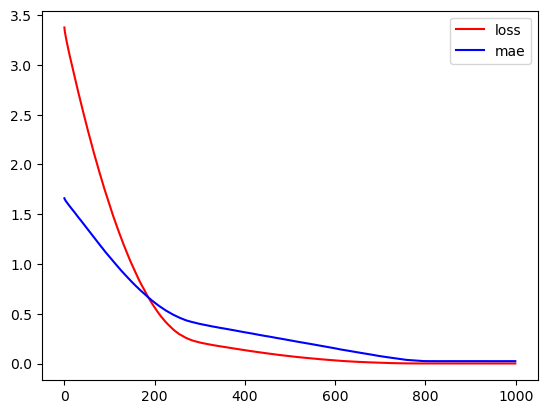

In [63]:
# 6. 평가하기
plt.plot(hist2.history['loss'],'r',label='loss')
plt.plot(hist2.history['mae'],'b',label='mae')
plt.legend()

In [64]:
# 7. 예측하기
model2.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 43ms/step


array([[0.3137962 ],
       [0.33188885]], dtype=float32)

In [65]:
y_hat2 = model2.predict([scaled_data_c])

4/4 [==============================] - 0s 2ms/step


In [67]:
for h , y in zip(y_hat2,scaled_data_f):
    print("예측:{},실제:{}".format(h,y))

예측:[0.3137962],실제:0.37071577111401066
예측:[0.33188885],실제:0.32402187888377504
예측:[0.34998152],실제:0.3569846049103575
예측:[0.36807418],실제:0.3862254884898952
예측:[0.38616684],실제:0.3683323091412279
예측:[0.4042595],실제:0.41006196718717836
예측:[0.42235216],실제:0.427973288424262
예측:[0.44044483],실제:0.3933582708096373
예측:[0.4585375],실제:0.4945297401699047
예측:[0.47663015],실제:0.5000149554775866
예측:[0.4947228],실제:0.4812371307809973
예측:[0.5128155],실제:0.5128535521641284
예측:[0.5309081],실제:0.5511589812259027
예측:[0.5490008],실제:0.5461593075442506
예측:[0.5670935],실제:0.5647175276398237
예측:[0.5851861],실제:0.5464027576252762
예측:[0.60327876],실제:0.6246374093567565
예측:[0.62137145],실제:0.6297164271586113
예측:[0.63946414],실제:0.6522337977127989
예측:[0.6575568],실제:0.6162042640439047
예측:[0.6756494],실제:0.7295209907355943
예측:[0.6937421],실제:0.7026300660636909
예측:[0.7118348],실제:0.7043858017014084
예측:[0.7299274],실제:0.7948721666228333
예측:[0.74802005],실제:0.7506384191041805
예측:[0.76611274],실제:0.7264796390256026
예측:[0.7842054],실제:0.7758

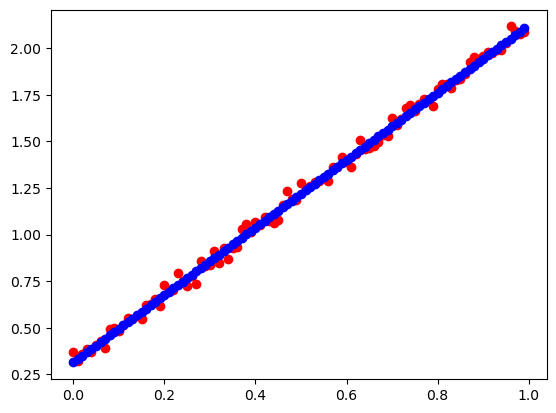

In [69]:
plt.scatter(x= scaled_data_c,y=scaled_data_f,color='r')
plt.scatter(x= scaled_data_c,y= y_hat2,color='b')